In [1]:
%cd C:\Users\tanak\study\参考書\統計的因果推論\causality-main
import pandas as pd

C:\Users\tanak\study\参考書\統計的因果推論\causality-main


### データ
1人当たりの国内総生産(GDP)を交絡因子の候補として使用し、ノーベル賞受賞者数とチョコレート消費量の関係について検証する。
変数y1は、人口1千万人当たりのノーベル賞受賞者数である。変数x1は、人口1人当たりの年間のチョコレート消費量(kg)である。変数x2は1人当たりの国内総生産(単位：1000米ドル)である。

In [4]:
data = pd.read_csv('data06.csv')
data.describe()

,y1,x1,x2
count,23.000000,23.000000,23.000000
mean,9.747739,4.869565,44.704478
std,9.124687,2.369011,20.999829
min,0.000000,0.100000,8.755000
25%,1.961321,4.000000,31.453000
50%,8.643573,4.900000,46.232000
75%,13.856512,6.200000,53.908000
max,30.763108,8.800000,85.135000


### 分散
変数$Y$の不偏分散は、
$$
var[Y_i]=\frac{1}{n-1}\sum_{i=1}^n(Y_i-\bar{Y})^2
$$
分散の分子である偏差平方和は、変数$Y$の総和変動(TSS)を表している。

In [17]:
import numpy as np

n = len(data)

hensa = data.y1 - data.y1.mean()
hensa2 = hensa**2
tss = hensa2.sum()
print('tss       ', tss)
print('tss/(n1-1)', tss/(n-1))
print('var(y1)   ', data.y1.var(ddof=1))

tss        1831.71823454121
tss/(n1-1) 83.25991975187318
var(y1)    83.25991975187318


### ESSとUSS
まず単回帰モデル$\hat{Y}_i=\hat{\beta}_0+\hat{\beta}_1X_{1i}$を考える。
各国の経済力は考慮せず、チョコレートの消費量がノーベル賞受賞者数にどれくらいの効果を持っているかを調べる。
最小二乗の条件を満たす$\hat{\beta}_0,\hat{\beta}_1$は次のようになる。
$$
\hat{\beta}_0=\frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum(X_i-\bar{X})^2}\\
\hat{\beta}_1=\bar{Y}-\hat{\beta}_1\bar{X}
$$

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     20.42
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           0.000188
Time:                        15:14:05   Log-Likelihood:                -75.166
No. Observations:                  23   AIC:                             154.3
Df Residuals:                      21   BIC:                             156.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4217      3.227     -1.060      0.3

Text(0, 0.5, 'y1')

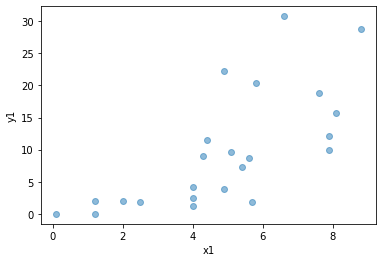

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_X = sm.add_constant(data[['x1']])
df_y = data['y1']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

plt.scatter(data.x1, data.y1, alpha=.5)
plt.xlabel('x1')
plt.ylabel('y1')

この結果から、人口1人当たりのチョコレート消費量が1kg多いと、人口1千万人当たりのノーベル賞受賞者は平均して約27044人多いと解釈できる。
次の式はESSであり、$X_1$を説明変数とする単回帰モデルから説明できる$Y$の変動部分である。
$$
ESS=\sum_{i=1}^n(\hat{Y}_i-\bar{Y})^2
$$

In [31]:
yhat1 = -3.4217 + 2.7044 * data.x1
yhat2 = (yhat1 - data.y1.mean())**2
ess = yhat2.sum()
print('yhat1\n', yhat1.ravel())
print('ESS', ess)
# predictを使ってもよい
print('predict\n',result.predict(df_X).ravel())

yhat1
 [ 9.82986 18.48394 11.72294 -0.17642  7.3959  -3.15126  9.82986 11.18206
  8.20722 17.94306  3.3393  17.94306  7.3959  -0.17642 10.37074 12.26382
 11.99338  1.9871   7.3959  14.42734 20.37702 17.13174  8.47766]
ESS 903.0227986732095
predict
 [ 9.83004809 18.48421881 11.72314793 -0.17633681  7.39606257 -3.15120799
  9.83004809 11.18226226  8.20739108 17.94333314  3.33942005 17.94333314
  7.39606257 -0.17633681 10.37093376 12.2640336  11.99359077  1.98720587
  7.39606257 14.42757628 20.37731865 17.13200463  8.47783391]


次の式はUSSであり、$X_1$を説明変数とする単回帰モデルから説明できない$Y$の変動部分であり、残差平方和である。
$$
USS=\sum_{i=1}^n(Y_i-\hat{Y}_i)^2=\sum_{i=1}^ne_i^2
$$

In [40]:
e1 = data.y1 - yhat1
e2 = e1**2
uss = e2.sum()
print('e1\n',e1.ravel())
print('uss',uss)
# residで確認できる
print('resid\n',result.resid.ravel())

e1
 [ -5.9585345   -2.82540172  -3.07936723   0.17642     -3.22203374
   3.17250979  12.41766355  -3.92178344   0.83960101  -7.96170361
  -1.47337858  -5.88857372  -4.86079432   2.15698561  -0.71997342
   8.11106303 -10.1600554   -0.04502284  -6.12992292  16.33576773
   8.42187044   1.6514565    2.96751395]
uss 928.6765050876865
resid
 [ -5.95872259  -2.82568053  -3.07957516   0.17633681  -3.22219631
   3.17245778  12.41747546  -3.9219857    0.83942993  -7.96197675
  -1.47349863  -5.88884686  -4.86095689   2.15690242  -0.72016718
   8.11084943 -10.16026616  -0.04512871  -6.13008549  16.33553145
   8.42157179   1.65119187   2.96734004]


### 決定係数
次の式は決定係数を表す。
$$
R^2=1-\frac{\sum(Y_i-\hat{Y})^2}{\sum(Y_i-\bar{Y})^2}=1-\frac{USS}{TSS}
$$


In [51]:
r2 = 1 - uss/tss
print('r2 ',r2)
# こちらでもよい
print('r2 ',result.rsquared)

r2  0.4930025330449954
r2  0.4930025335393128


この値は、$X_1$を説明変数とする単回帰モデルから説明できる$Y$の変動部分の割合であるから、「チョコレート消費量を説明変数とする単回帰モデルから、ノーベル賞受賞者数の変動の約49.30%を説明できる」と解釈できる。
### 回帰係数の標準偏差と回帰の標準誤差
回帰係数$\hat{\beta}_1$の標準誤差は、次の式となる。
$$
\begin{align}
s.e.(\hat{\beta}_1)&=\frac{s_{reg}}{\sqrt{\sum(X_i-\bar{X})^2}}\\
s_{reg}&=\sqrt{\frac{\sum(Y_i-\hat{Y}_i)^2}{n-k}}=\sqrt{\frac{USS}{n-k}}
\end{align}
$$
分母は説明変数がどれくらいばらついているかを表している。分子$s_{reg}$は、回帰の標準誤差である。
また、回帰の標準誤差の分子は、USSである。なお、$n-k$は自由度を表し、$k$は推定すべき母数の個数を表す。

### 三変数の重回帰モデル
$Y_i=\beta_0+\beta_1X_{1i}+\beta_2X_{2i}+\varepsilon_i$における$\beta_1$の偏りのない推定を行うことを考える。
$X_1$と$X_2$には交絡があるとし、それを$A$とする。
ここでは、$A$を取り除いて、$X_1$から$Y$への純粋な効果を測る方法を考察する。
三変数の重回帰モデルにおける$\beta_1,\beta_2,\beta_0$の最小二乗による推定方法は、
$$
\begin{align}
\hat{\beta}_1&=\frac{\sum (X_{1i}-\hat{X}_{1i})(Y_i-\bar{Y})}{\sum(X_{1i}-\hat{X}_{1i})^2}\\
\hat{\beta}_2&=\frac{\sum (X_{2i}-\hat{X}_{2i})(Y_i-\bar{Y})}{\sum(X_{2i}-\hat{X}_{2i})^2}\\
\hat{\beta}_0&=\bar{Y}-\hat{\beta}_1\bar{X}_1-\hat{\beta}_2\bar{X}_2
\end{align}
$$
である。
ここで、$\hat{X}_{1i}=a_1+b_1X_{2i}$である。すなわち、三変数の重回帰モデルは二段階で分析を行っている。
まず、単回帰モデル$\hat{X}_{1i}=a_1+b_1X_{2i}$を作り、$X_{2i}$から予測値$\hat{X}_{1i}$を計算する、次に残差$X_{1i}-\hat{X}_{1i}$計算して、この残差部分から$Y$への回帰を行っている。

In [59]:
df_X1 = sm.add_constant(data[['x2']])
df_y1 = data['x1']

model1 =  sm.OLS(df_y1, df_X1)
result1 = model1.fit()
ex1 = result1.resid

df_X2 = sm.add_constant(data[['x1','x2']])
df_y2 = data['y1']

model2 = sm.OLS(df_y2, ex1)
result2 = model2.fit()

model3 = sm.OLS(df_y2, df_X2)
result3 = model3.fit()

In [60]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.32
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           0.000253
Time:                        23:18:30   Log-Likelihood:                -44.461
No. Observations:                  23   AIC:                             92.92
Df Residuals:                      21   BIC:                             95.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3788      0.874      1.577      0.1

In [61]:
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.8275
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                       0.373
Time:                        23:18:38   Log-Likelihood:                         -91.584
No. Observations:                  23   AIC:                                      185.2
Df Residuals:                      22   BIC:                                      186.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           0.000109
Time:                        23:18:43   Log-Likelihood:                -72.484
No. Observations:                  23   AIC:                             151.0
Df Residuals:                      20   BIC:                             154.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3203      3.203     -1.973      0.0

1人当たりの国内総生産が一定であるならば、人口1人当たりのチョコレート消費量が1kg多くなると、人口1千万人当たりのノーベル賞受賞者数が平均して約1.505人増えるといえる。また、信頼区間を見ると0が含まれているため、5％の有意水準で帰無仮説$\beta_0=0$を棄却できない。
国ごとの経済力を考慮に入れれば、チョコレート消費量は、ノーベル賞受賞者数に対して因果的な効果を持っているとは言えないと結論付けられる。